## 1) import Libraries

In [1]:
import numpy as np, pandas as pd#,scipy
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



## 2) load Datasets

In [ ]:
# load dataset
from sklearn.datasets import load_iris
iris = load_iris()

########################3

from sklearn.datasets import fetch_openml
# Load the MNIST data
X_Number, Y_Number = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
 
# Randomly select 1000 samples for performance reasons
np.random.seed(100)
subsample_idc = np.random.choice(X_Number.shape[0], 1000, replace=False)
X_Number =X_Number[subsample_idc,:]
Y_Number = Y_Number[subsample_idc]

###########################

from sklearn.datasets import load_diabetes
scaler = MinMaxScaler()
diabets= load_diabetes()
#diabets.data = scaler.fit_transform(diabets.data.astype("float"))

#diabets.target

target_diabets=np.array([0 if x<=110 else 1 if 110<x<=130 else 2 for x in diabets.target])

#################33
from sklearn.datasets import load_wine
scaler = MinMaxScaler()
WINE=load_wine()
WINE.data = scaler.fit_transform(WINE.data.astype("float"))



## 3) Analysis Fucntions

In [94]:


def PLOT(TITLE="test",Product="",Label="",Data="",lim=""):

    plt.figure(dpi=80,figsize=(9,6))

    #plt.grid()
    sns.scatterplot(x="{PR}_1".format(PR=Product), y="{PR}_2".format(PR=Product), hue=Label, data=Data,s=90)
    plt.grid()
    plt.legend()
    plt.title(TITLE)



def T_SNE(X,Label,Component=2,title=""):

    #tsne = TSNE(n_components=Component,learning_rate=100)
    tsne = TSNE(n_components=Component)

    tsne_result = tsne.fit_transform(X)
    # Plot the result of our TSNE with the label color coded
    # A lot of the stuff here is about making the plot look pretty and not TSNE
    tsne_result_df = pd.DataFrame({'T_SNE_1': tsne_result[:,0], 'T_SNE_2': tsne_result[:,1], 'label': Label})
    lim = (tsne_result.min()-0.1*tsne_result.min(), tsne_result.max()+0.1*tsne_result.min())
    
    PLOT(TITLE=title,Product="T_SNE",Label=Label,Data=tsne_result_df,lim=lim)

    return tsne_result,tsne
    

def PCA_Components(X,Label,Component=2,title=""):
    pca_c=PCA(n_components=Component)
    pca_results=pca_c.fit_transform(X)
    Col_x=["PCA_{I}".format(I=i) for i in range(1,Component+1)]
    df=pd.DataFrame(data=pca_results,columns=Col_x)
    lim = (pca_results.min()-0.1*pca_results.min(), pca_results.max()+0.1*pca_results.min())
    PLOT(TITLE=title,Product="PCA",Label=Label,Data=df,lim=lim)

    
    return pca_results,pca_c
    
    
    
    

## 4) Prformance Testing

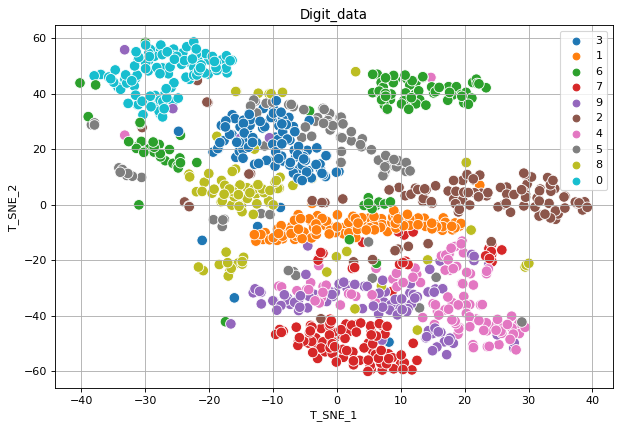

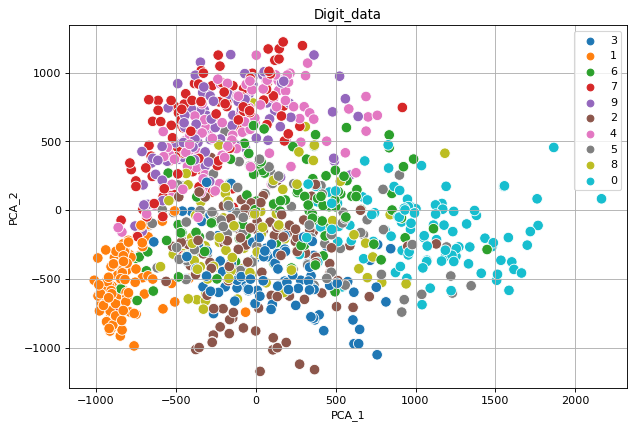

In [95]:
result,tsne=T_SNE(X=X_Number,Label=Y_Number,Component=2,title="Digit_data")
PCA_result,PCA_model=PCA_Components(X=X_Number,Label=Y_Number,Component=2,title="Digit_data")

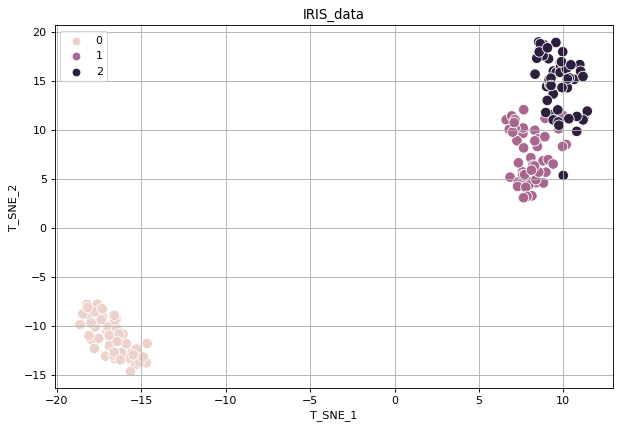

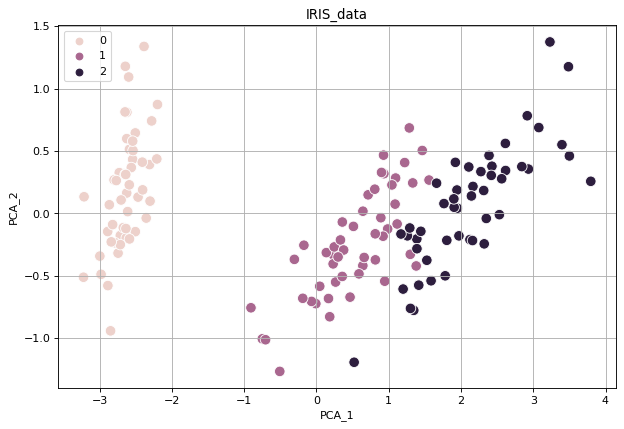

In [96]:
TSNE_result,TSNE_model=T_SNE(X=iris.data,Label=iris.target,Component=2,title="IRIS_data")
PCA_result,PCA_model=PCA_Components(X=iris.data,Label=iris.target,Component=2,title="IRIS_data")



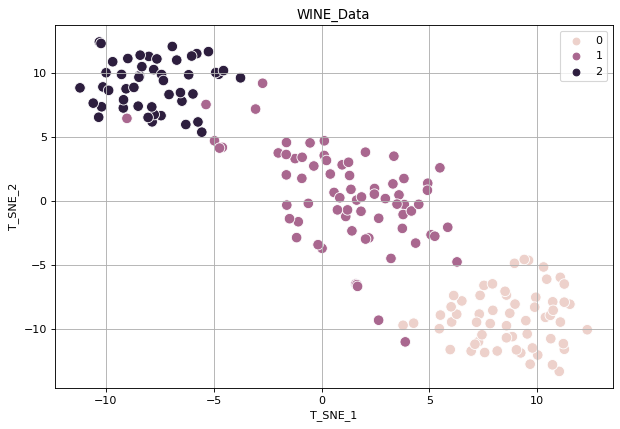

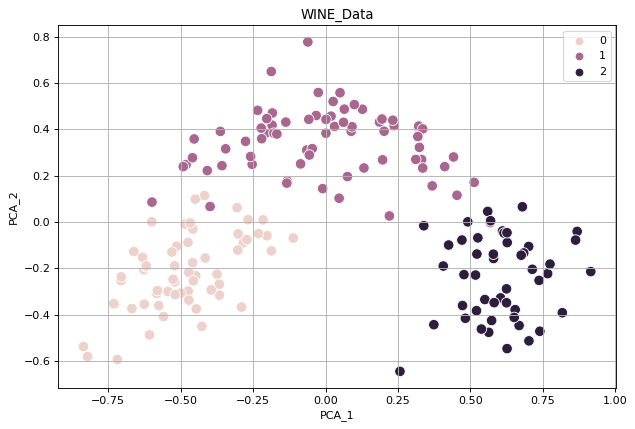

In [97]:
TSNE_result,TSNE_model=T_SNE(X=WINE.data,Label=WINE.target,Component=2,title="WINE_Data")
PCA_result,PCA_model=PCA_Components(X=WINE.data,Label=WINE.target,Component=2,title="WINE_Data")
